# Bollinger Bands and ATR (Average True Range)

1. Both are volatility based indicators
1. Bollinger band comprises of 2 lines plotted n (typically 2) standard deviations from a 'm' period simple moving average line (m is typically 20). The bands widen during periods of increased volatility and shrink during periods of reduced volatility
1. The ATR takes in account the market movement each day in either direction and averaging them out. It focuses on total price movement and conveys how wildly the market is swinging as it moves.
    1. ATR doesn't look into standard deviation, instead it looks at three ranges:
        1. Difference between high and low
        1. Difference between high and previous day's close
        1. Difference between low and previous day's close
    1. TR = max((high - low), abs(high - close<sub>prev</sub>}), abs(low - close<sub>prev</sub>))
    1. ATR = avg(TR) over n obervations
1. Traders typically use them in conjunction as they approach volatility differently and are complementary.
1. If both the ATR and Bollinger are within a tight band, the traders get excited because it's highly likely that a breakout our trend will start to form really soon.

In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

from TechnicalIndicators import TechnicalIndicators

In [2]:
ticker = 'MSFT'
start = datetime.datetime.today() - datetime.timedelta(1825)
end = datetime.datetime.today()
ohlcv = pd.DataFrame() 

In [3]:
ohlcv = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df = ohlcv.copy()
TechnicalIndicators.add_atr(df)
df

,Open,High,Low,Close,Adj Close,Volume,TR,ATR
Date,,,,,,,,
2016-04-08,54.669998,55.279999,54.320000,54.419998,49.901596,22167200,5.341713,4.988294
2016-04-11,54.490002,55.150002,54.299999,54.310001,49.800735,21414200,5.248405,4.983633
2016-04-12,54.369999,54.779999,53.759998,54.650002,50.112518,24944300,4.979263,4.986281
2016-04-13,55.119999,55.439999,54.889999,55.349998,50.754379,20818000,5.327480,5.010925
2016-04-14,55.220001,55.580002,55.070000,55.360001,50.763554,20877100,4.825623,4.979232
...,...,...,...,...,...,...,...,...
2021-03-02,237.009995,237.300003,233.449997,233.869995,233.869995,22785500,3.850006,4.441518
2021-03-03,232.160004,233.580002,227.259995,227.559998,227.559998,33950400,6.610001,4.591019
2021-03-04,226.740005,232.490005,224.259995,226.729996,226.729996,44584200,8.230011,4.696001


In [5]:
TechnicalIndicators.add_bollinger(df)
df

,Open,High,Low,Close,Adj Close,Volume,TR,ATR,MA,BB_up,BB_dn,BB_Width
Date,,,,,,,,,,,,
2016-06-02,52.639999,52.740002,51.840000,52.480000,48.459274,22840800,3.939091,4.544123,47.212871,48.593840,45.831903,2.761938
2016-06-03,52.380001,52.419998,51.599998,51.790001,47.822124,23368300,3.960724,4.513629,47.314299,48.536771,46.091828,2.444943
2016-06-06,51.990002,52.349998,51.889999,52.130001,48.136093,18243300,4.527874,4.510201,47.410794,48.490462,46.331125,2.159337
2016-06-07,52.240002,52.730000,52.099998,52.099998,48.108387,20866800,4.593906,4.520706,47.520574,48.487743,46.553405,1.934338
2016-06-08,52.020000,52.439999,51.869999,52.040001,48.052975,21149400,4.331612,4.477926,47.584028,48.469585,46.698471,1.771114
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02,237.009995,237.300003,233.449997,233.869995,233.869995,22785500,3.850006,4.441518,239.342428,250.864631,227.820225,23.044407
2021-03-03,232.160004,233.580002,227.259995,227.559998,227.559998,33950400,6.610001,4.591019,238.772446,249.260720,228.284173,20.976547
2021-03-04,226.740005,232.490005,224.259995,226.729996,226.729996,44584200,8.230011,4.696001,237.986865,247.344615,228.629115,18.715500


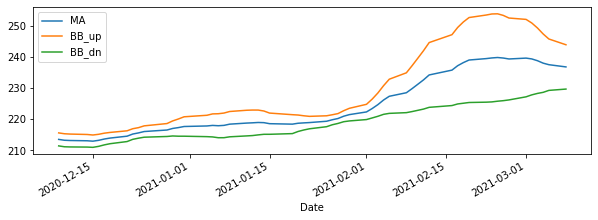

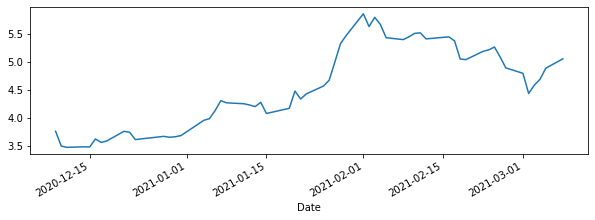

In [9]:
df[['MA', 'BB_up', 'BB_dn']][-60:].plot(figsize=(10, 3));
plt.show()
df['ATR'][-60:].plot(figsize=(10, 3));